In [29]:
from google.colab import drive
drive.mount('/content/drive')
%pip install pandas
from pandas import *


%pip install --upgrade pip
%pip install --upgrade nltk

%pip install PyPDF2
%pip install ntlk
import os


# # importing required modules
from PyPDF2 import PdfReader

import nltk 

nltk.download('wordnet')
nltk.download('punkt')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ntlk (from versions: none)
ERROR: No matching distribution found for ntlk


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:

# # importing required modules
# from PyPDF2 import PdfReader

from nltk.corpus import wordnet as wn
# import nltk 
# # nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

  
lemmatizer = WordNetLemmatizer()


part = wn.synsets('body_part')[0]

# https://stackoverflow.com/questions/73117109/how-to-identify-body-part-names-in-a-text-with-python
def is_body_part(candidate):
    for ss in wn.synsets(candidate):
        # only get those where the synset matches exactly
        name = ss.name().split(".", 1)[0]
        if name != candidate:
            continue
        hit = part.lowest_common_hypernyms(ss)
        if hit and hit[0] == part:
            return True
    return False

import os
 
# assign directory
directory = '/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/scripts/'
 
# iterate over files in
# that directory

files = []
for filename in os.scandir(directory):
    if filename.is_file():
        files.append(filename.path)
 



In [31]:
def get_title(file_name):
    title = file_name.split("/")[-1]
    # title = title.replace(" ","")
    # title = title.replace("-","")
    title = title.replace(".pdf","")
    title = title.replace(".php","")
    
    return title
# # getting a specific page from the pdf file
# page = reader.pages[0]
 
# # extracting text from page
# text = page.extract_text()

# creating a pdf reader object


 
# printing number of pages in pdf file
# print(len(reader.pages))


words_0= ['body', 'lips', 'beauty', 'age', 'smile', 'pants', 'skirt', 'dress', 'shirt', 'glow', 'shorts', 'hand','face','finger', 'throat','neck','hair','skin','arm','figure','shoulder'] 
adj_0=['beautiful', 'gorgeous', 'cute', 'pretty', 'devoted', 'lawful','housewife', 'dumb', 'ignorant', 'silly', 'fragile', 'frightening', 'enchanting', 'stunning','toned', 'breathtaking', 'breath-taking', 'sultry','divine', 'perfect']
words_1=['ass', 'buxom','boob', 'boobs', 'breast', 'breasts','thighs', 'bottom', 'curves', 'underwear', 'panty', 'stockings', 'panties', 'lingerie', 'bra', 'nipple','vagina','cunt','']
adj_1= ['seductive','sexy','trashy', 'nude', 'promiscuous', 'sexual', 'hot', 'hottie', 'erotic','fuck-me', 'fuck me','juicy']


keywords = ['body','boob','chest','bosom','thighs','thigh','waist','breast','ass','lips',
                                                                                'beautiful','attractive','hottie','hot','skirt','beauty','sexy','age',
                                                                                'blond','smile','dumb','cute','perfect','buxom','dress','fit','tight',
                                                                                'blonde','natural','bra','underwear','panty','panties','divine',
                                                                                'curve','curves','trashy','nude','toned','fragile','pretty','womanhood',
                                                                                'breathtaking','fuck me eyes','erotic','lingerie','erotic','glow','gorgeous',
                                                                                'banging','seductive','promiscuous','enchanting',
                                                                                'figure','fuck-me','fuck me','sexual','pants','shirt','dress','shorts']


movies_dict={}
movies_dict_1={}


for f in files:
    movie_title = get_title(f)
    print("--------------------------------------------", movie_title, "-----------------------------------------")

    reader = PdfReader(f)
    lst=[]
    # len(reader.pages)
    for i in range(0,len(reader.pages)):
        page = reader.pages[i]
        text = page.extract_text()
        lst.append(text)
    #     print(text)
    #     print("-----------------")
    # len(lst[0])

    
    word_counts={}
    word_counts_1={}
    
    check = ["she", "her", "woman", "woman's", "women", "women's", "she's"]

    for i in lst:
        tokens = word_tokenize(i)
    #     for j in i:
    #         tokens = word_tokenize(j) 
    #         print(tokens)
        for k in range(0,len(tokens)):
            #lemmatize
            tokens[k] = lemmatizer.lemmatize(tokens[k])
    #         print(tokens[k].lower())
    
            if is_body_part(tokens[k].lower()) == True or tokens[k].lower() in words_0+adj_0:
                
                gram2 = tokens[k-2].lower()
                gram1 = tokens[k-1].lower()
                gram = tokens[k].lower()
                if k+1 in range(-len(tokens), len(tokens)):
                  gram0 = tokens[k+1].lower()

                if k-3 in range(-len(tokens), len(tokens)):
                  gram3 = tokens[k-3].lower()

                if gram3 in check or gram2 in check or gram1 in check or gram0 in check:
                    print(gram3,gram2,gram1,gram,gram0)

            
            
                    if tokens[k].lower() in word_counts:
                        # print(tokens[k], gram0)
                        word_counts[tokens[k].lower()] += 1
                    else:
                        word_counts[tokens[k].lower()] = 1

            if tokens[k].lower() in words_1+adj_1:
                if k+1 in range(-len(tokens), len(tokens)):
                  gram0 = tokens[k+1].lower()

                if k-3 in range(-len(tokens), len(tokens)):
                  gram3 = tokens[k-3].lower()
                
                gram2 = tokens[k-2].lower()
                gram1 = tokens[k-1].lower()
                gram0 = tokens[k].lower()
#                 check = ('his','he','man','men',"man's","men's",'her','she','their','woman','women', "woman's","women's")

                if gram3 in check or gram2 in check or gram1 in check or gram0 in check:
            
                    if tokens[k].lower() in word_counts_1:
                        # print(tokens[k], gram0)
                        word_counts_1[tokens[k].lower()] += 1
                    else:
                        word_counts_1[tokens[k].lower()] = 1
                    print('dubious',gram2,gram1,gram0)
                    
    movies_dict[movie_title] = word_counts
    movies_dict_1[movie_title] = word_counts_1
    
    #make sure movie names are the primary keys     
print(movies_dict,"------------------------------------------------------------------------------------", movies_dict_1)

-------------------------------------------- Star Wars_ episode IV -----------------------------------------
a woman 's hand puts
fear in her eye slowly
inspect her inert body .
, shaking her fist at
stormtroopers . her hand are
? she 's beautiful .
? bring her back !
leia . her hand are
leia lower her head .
look on her face .
by her incredible beauty and
her with his mouth hanging
look on her face .
pressure against her body .
looking over her shoulder out
leia shake her head .
is at her side .
she throw her arm around
-------------------------------------------- The-Exorcist -----------------------------------------
look over her shoulder to
she pass the attic hatch
and stroke her face .
pen in her mouth and
script in her hand .
her script in hand .
right . she hand her
and close her eye .
regan shake her head .
never should have left her
she club her hand on
it to her head .
edima affected her brain ,
fix up her leg ,
slowly turn her eye to
nurse with her back against
from her godd

In [32]:

body_descriptions = DataFrame.from_dict(movies_dict, orient="index")
print(body_descriptions)

                                               hand   eye  body  fist  \
Star Wars_ episode IV                           3.0   1.0   2.0   1.0   
The-Exorcist                                   16.0   6.0   NaN   NaN   
fiddler on the roof                             1.0   NaN   NaN   NaN   
ManofSteelnSecondDraftn                         8.0  17.0   NaN   NaN   
pirates-of-the-caribbean-dead-mans-chest-2006   4.0   3.0   NaN   NaN   
...                                             ...   ...   ...   ...   
The Sea Chase                                   NaN   NaN   NaN   NaN   
the bells of st.mary                            NaN   NaN   NaN   NaN   
song-of-the-south                               NaN   NaN   NaN   NaN   
batmanforever                                   NaN   NaN   NaN   NaN   
Sergeant York                                   NaN   NaN   NaN   NaN   

                                               beautiful  back  head  face  \
Star Wars_ episode IV                        

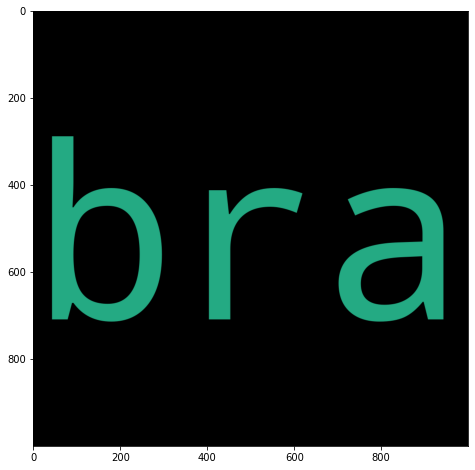

In [34]:
print(psycho_naughty)
naughty_descriptions = DataFrame.from_dict(movies_dict_1, orient="index")
naughty_descriptions


{'bra': 3}


,cunt,bottom,vagina,bra,hot,underwear,breast,sexy,erotic,sexual,nude
The-Exorcist,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
supermanII,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
ghost,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
titanic-numbered,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
superman,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
the-graduate,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beverly-hills-copII,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
forrestgump,NaN,NaN,NaN,3.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
psycho,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
harry-potter-and-the-deathly-hollows-part-2-2011,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#get general descriptions - n-grams


words_0= ['body', 'lips', 'beauty', 'age', 'smile', 'pants', 'skirt', 'dress', 'shirt', 'glow', 'shorts','clothes', 'jacket'] 
adj_0=['beautiful', 'handsome', 'muscular', 'gorgeous', 'cute', 'confused', 'sad','pretty', 'devoted', 'lawful','housewife', 'dumb', 'ignorant', 'silly', 'smart','thinking','stunned','mysterious', 'enchanting', 'stunning','toned', 'breathtaking', 'breath-taking', 'divine', 'perfect']


words_prob=['ass', 'buxom','boob', 'boobs', 'breast', 'breasts','thighs', 'bottom', 'curves', 'underwear', 'panty', 'stockings', 'panties', 'lingerie', 'bra', 'nipple']
adj_prob= ['seductive','sexy','trashy', 'nude', 'promiscuous', 'sexual', 'hot', 'hottie', 'erotic','fuck-me', 'fuck me','juicy']


movies_dict_men={}
movies_dict_women={}


movies_dict_men_1={}
movies_dict_women_1={}


#all data summed up

movies_tot={}
movies_total_f={}
movies_total_m={}
movies_total_f_1={}
movies_total_m_1={}

for f in files:
    movie_title = get_title(f)
    print("--------------------------------------------", movie_title, "-----------------------------------------")


    reader = PdfReader(f)
    lst=[]
    # len(reader.pages)
    for i in range(0,len(reader.pages)):
        page = reader.pages[i]
        text = page.extract_text()
        lst.append(text)
    #     print(text)
    #     print("-----------------")
    # len(lst[0])

    
    word_counts_men={}
    word_counts_women={}
    word_counts_men_1 = {}
    word_counts_women_1 = {}

    
    
    from nltk.tokenize import word_tokenize

    for i in lst:
        tokens = word_tokenize(i)
    #     for j in i:
    #         tokens = word_tokenize(j) 
    #         print(tokens)
        for k in range(0,len(tokens)):
            #lemmatize
            tokens[k] = lemmatizer.lemmatize(tokens[k])
    #         print(tokens[k].lower())


#                 check = ('his','he','man','men',"man's","men's",'her','she','their','woman','women', "woman's","women's")

            check_women = ['her','she','woman','women', "woman's","women's"]
            check_men = ['his','he','man','men',"man's","men's"]

            if is_body_part(tokens[k].lower()) == True or tokens[k].lower() in words_0+adj_0:
              if k+1 in range(-len(tokens), len(tokens)):
                gram0 = tokens[k+1].lower()

              if k-3 in range(-len(tokens), len(tokens)):
                gram3 = tokens[k-3].lower()

      
              if k-2 in range(-len(tokens), len(tokens)):
                  
                  gram2 = tokens[k-2].lower()
              
              if k-1 in range(-len(tokens), len(tokens)):
                  gram1 = tokens[k-1].lower()
                  gram = tokens[k].lower()

    #CHECK WOMEN

              if gram3 in check_women or gram2 in check_women or gram1 in check_women or gram0 in check_women:
                  print(gram2,gram1,gram,gram0)


              
                  if tokens[k].lower() in word_counts_women:
                      # print(tokens[k], gram0)
                      word_counts_women[tokens[k].lower()] += 1
                      movies_total_f[tokens[k].lower()] += 1

                  else:
                      word_counts_women[tokens[k].lower()] = 1
                      movies_total_f[tokens[k].lower()] = 1


        
                
#                 check = ('his','he','man','men',"man's","men's",'her','she','their','woman','women', "woman's","women's")
#CHECK MEN
            
            # if is_body_part(tokens[k].lower()) == True or tokens[k].lower() in words_0+adj_0:

              if gram3 in check_men or gram2 in check_men or gram1 in check_men or gram0 in check_men:
              
                  if tokens[k].lower() in word_counts_men:
                      # print(tokens[k], gram0)
                      word_counts_men[tokens[k].lower()] += 1
                      movies_total_m[tokens[k].lower()] += 1

                  else:
                      word_counts_men[tokens[k].lower()] = 1
                      movies_total_m[tokens[k].lower()] = 1

                  print("men",gram2,gram1,gram,gram0)

            
   #========================================!!!!!!!!!!! FIND INAPPROPRIATE SPEECH !!!!!!!!!!!!!!!!!!!!!!!!!!==============================     


            if tokens[k].lower() in words_1+adj_1:
              if k+1 in range(-len(tokens), len(tokens)):
                gram0 = tokens[k+1].lower()

              if k-3 in range(-len(tokens), len(tokens)):
                gram3 = tokens[k-3].lower()

      
              if k-2 in range(-len(tokens), len(tokens)):
                  
                  gram2 = tokens[k-2].lower()
              
              if k-1 in range(-len(tokens), len(tokens)):
                  gram1 = tokens[k-1].lower()
                  gram = tokens[k].lower()

    #CHECK WOMEN

              if gram3 in check_women or gram2 in check_women or gram1 in check_women or gram0 in check_women:
                  print(gram2,gram1,gram,gram0)


              
                  if tokens[k].lower() in word_counts_women_1:
                      # print(tokens[k], gram0)
                      word_counts_women_1[tokens[k].lower()] += 1
                      movies_total_f_1[tokens[k].lower()] += 1

                  else:
                      word_counts_women_1[tokens[k].lower()] = 1
                      movies_total_f_1[tokens[k].lower()] = 1


                  
  #                 check = ('his','he','man','men',"man's","men's",'her','she','their','woman','women', "woman's","women's")
  #CHECK MEN
              
              # if is_body_part(tokens[k].lower()) == True or tokens[k].lower() in words_0+adj_0:

              if gram3 in check_men or gram2 in check_men or gram1 in check_men or gram0 in check_men:
              
                  if tokens[k].lower() in word_counts_men_1:
                      # print(tokens[k], gram0)
                      word_counts_men_1[tokens[k].lower()] += 1
                      movies_total_m_1[tokens[k].lower()] += 1

                  else:
                      word_counts_men_1[tokens[k].lower()] = 1
                      movies_total_m_1[tokens[k].lower()] = 1

                  print("men_1",gram2,gram1,gram,gram0)
      
          
  # print(movies_dict_women,"------------------------------------------------------------------------------------", movies_dict_men)
        
    movies_dict_women[movie_title] = word_counts_women
    movies_dict_men[movie_title] = word_counts_men
    movies_tot["males"]=movies_total_m
    movies_tot["females"]=movies_total_f

    #fill inappropriate

    movies_dict_women_1[movie_title] = word_counts_women_1
    movies_dict_men_1[movie_title] = word_counts_men_1







Streaming output truncated to the last 5000 lines.
men his huge eye bulge
men his scum-coated tongue flops
men from his head .
men around his ankle ,
men lower his head ,
men with his eye dangling
men flex the hand ;
men his other arm and
men mussing his hair like
men . he smile at
men wounded mechanical hand .
men piercing yellow eye .
men shake his head )
men crease his face .
men on his side ,
men close his eye .
men open his eye again
men of his eye .
men shake his head dejectedly
stern but beautiful woman
men his hairy paw and
men into his eye questioningly
men his steering vane into
men on his tail .
the scout eye her
men his laser cannon .
men his domed head and
. her clothes are
put her head in
in her hand to
men , then cock his
men cock his head and
men suddenly his ear perk
at her head .
men out his hand for
! she hand the
take her back to
men his fuzzy head up
men his gloved hand to
men with his back to
men from his mouth .
men of his face and
men up his hand placatingly
men

In [54]:
print(movies_dict_women_1)
print(movies_dict_men_1)

{'Star Wars_ episode IV': {}, 'The-Exorcist': {}, 'fiddler on the roof': {}, 'song-of-the-south': {}, 'ManofSteelnSecondDraftn': {}, 'pirates-of-the-caribbean-dead-mans-chest-2006': {}, 'star-wars-lastjedi': {}, 'meninblack': {}, 'superman': {'bra': 1, 'panty': 1}, 'lawrence-of-arabia-1962': {}, 'independenceday': {}, 'the-godfather': {}, 'spider-man-2-2004': {}, 'harry-potter-and-the-deathly-hollows-part-2-2011': {}, 'the-avengers-2012': {}, 'top-gun-1986': {'hot': 1}, 'SomeLikeItHot': {}, 'jurassicpark': {}, 'starwars_revenge-of-sith': {}, 'star wars_the-empire-strikes-back': {}, 'terminator-2-judgement-day-1991': {}, 'the-graduate': {}, 'samson-and-delilah': {}, 'avatar': {}, 'casablanca': {}, 'ghostbuster': {}, 'beverly-hills-copII': {'bra': 2, 'nude': 1}, 'jaws-1975': {}, 'from_here_to_eternity_(1953)': {}, 'rogue-one': {}, 'batmanforever': {}, 'rocky': {}, 'BlackPanther': {}, 'gone with the wind': {}, 'forrestgump': {'bra': 3, 'panty': 1, 'underwear': 1, 'breast': 1}, 'starwars_t

In [ ]:

movies_women = DataFrame.from_dict(movies_dict_women,orient="index")

movies_men = DataFrame.from_dict(movies_dict_men,orient="index")

print(movies_women.info())
print('---------------------------------------------------------------------------')
print(movies_men.info())


total_desc_men = DataFrame.from_dict(movies_total_m, orient="index")
total_desc_women = DataFrame.from_dict(movies_total_f, orient="index")

total_desc_men
# total_desc_women

In [ ]:
# movies_women.to_csv("/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/movies_desc_women.csv")
# movies_men.to_csv("/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/movies_desc_men.csv")

total_desc_men.to_csv("/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/total_desc_men.csv")
total_desc_women.to_csv("/content/drive/My Drive/DHDK/INFO-VIZ/infovizrepo/ProjectGaze/Data/total_desc_women.csv")

print(movies_total_f)

In [38]:
    # Count total keywords across all movies
for movie_title in movies_dict_women:
    word_counts_women = movies_dict_women[movie_title]
    for keyword in word_counts_women:
        if keyword in movies_total_f:
            movies_total_f[keyword] += word_counts_women[keyword]
        else:
            movies_total_f[keyword] = word_counts_women[keyword]

for movie_title in movies_dict_men:
    word_counts_men = movies_dict_men[movie_title]
    for keyword in word_counts_men:
        if keyword in movies_total_m:
            movies_total_m[keyword] += word_counts_men[keyword]
        else:
            movies_total_m[keyword] = word_counts_men[keyword]


print(movies_total_m)
print(movies_total_f)



    # Count total keywords across all movies INAPPROPRIATE SPEECH
for movie_title in movies_dict_women_1:
    word_counts_women_1 = movies_dict_women_1[movie_title]
    for keyword in word_counts_women_1:
        if keyword in movies_total_f_1:
            movies_total_f_1[keyword] += word_counts_women_1[keyword]
        else:
            movies_total_f_1[keyword] = word_counts_women_1[keyword]




{'face': 1367, 'hair': 156, 'valve': 3, 'arm': 821, 'foot': 649, 'throat': 105, 'lap': 33, 'shoulder': 429, 'back': 1178, 'joint': 5, 'head': 1675, 'eye': 1539, 'hand': 2323, 'body': 305, 'system': 19, 'plate': 39, 'small': 49, 'left': 240, 'beard': 15, 'stunned': 25, 'side': 190, 'claw': 52, 'ear': 166, 'mouth': 268, 'brain': 23, 'paw': 19, 'cannon': 29, 'right': 341, 'handsome': 29, 'lip': 168, 'wing': 24, 'nose': 109, 'tail': 53, 'brow': 68, 'jacket': 152, 'leg': 209, 'finger': 353, 'pretty': 13, 'neck': 202, 'cheek': 59, 'tongue': 55, 'thinking': 35, 'horn': 17, 'stomach': 27, 'smart': 35, 'age': 21, 'shirt': 163, 'smile': 276, 'wrist': 124, 'dress': 40, 'clothes': 68, 'chamber': 5, 'heart': 105, 'knee': 231, 'glow': 9, 'brush': 35, 'quick': 17, 'palm': 73, 'toe': 13, 'bristle': 3, 'fist': 205, 'skin': 63, 'blade': 37, 'tentacle': 15, 'buff': 3, 'temple': 29, 'bridge': 9, 'jaw': 56, 'eyelid': 11, 'tissue': 8, 'structure': 5, 'perfect': 11, 'waist': 35, 'cock': 49, 'area': 3, 'ball'

In [55]:
for movie_title in movies_dict_men_1:
    word_counts_men_1 = movies_dict_men_1[movie_title]
    for keyword in word_counts_men_1:
        if keyword in movies_total_m_1:
            movies_total_m_1[keyword] += word_counts_men_1[keyword]
        else:
            movies_total_m_1[keyword] = word_counts_men_1[keyword]

print(movies_dict_men_1)

{'Star Wars_ episode IV': {}, 'The-Exorcist': {}, 'fiddler on the roof': {}, 'song-of-the-south': {}, 'ManofSteelnSecondDraftn': {}, 'pirates-of-the-caribbean-dead-mans-chest-2006': {}, 'star-wars-lastjedi': {}, 'meninblack': {}, 'superman': {'bottom': 1}, 'lawrence-of-arabia-1962': {'bottom': 2, 'breast': 1}, 'independenceday': {'breast': 1}, 'the-godfather': {}, 'spider-man-2-2004': {}, 'harry-potter-and-the-deathly-hollows-part-2-2011': {}, 'the-avengers-2012': {}, 'top-gun-1986': {'hot': 2}, 'SomeLikeItHot': {'breast': 1}, 'jurassicpark': {'breast': 1}, 'starwars_revenge-of-sith': {}, 'star wars_the-empire-strikes-back': {}, 'terminator-2-judgement-day-1991': {}, 'the-graduate': {'breast': 1, 'bottom': 1}, 'samson-and-delilah': {}, 'avatar': {}, 'casablanca': {'breast': 2}, 'ghostbuster': {}, 'beverly-hills-copII': {'bottom': 1}, 'jaws-1975': {}, 'from_here_to_eternity_(1953)': {'hot': 3, 'underwear': 1}, 'rogue-one': {}, 'batmanforever': {}, 'rocky': {'hot': 1, 'breast': 1}, 'Blac

In [50]:
df_men = DataFrame.from_dict(movies_total_m, orient="index")


df_men = df_men.rename(columns={0:"men_count"})
df_men

df_women = DataFrame.from_dict(movies_total_f, orient="index")


df_women = df_women.rename(columns={0:"women_count"})
df_women

total_movie_counts = df_women.merge(df_men,left_index=True, right_index=True)
total_movie_counts

,women_count,men_count
hand,790,2323
eye,625,1539
body,90,305
fist,11,205
beautiful,55,5
...,...,...
middle,3,15
flesh,5,25
index,3,9
arch,3,3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


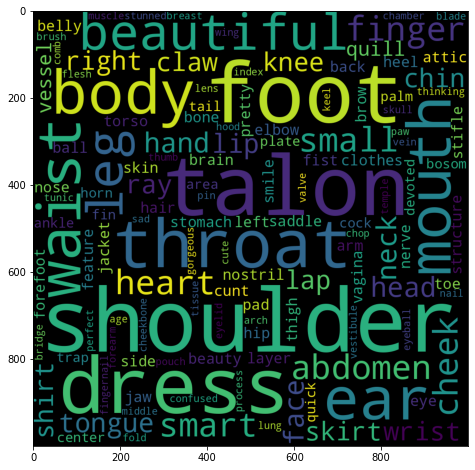

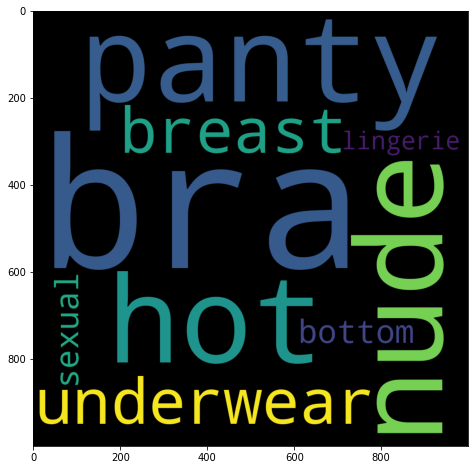

In [61]:
#word clouds

%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
overall_count_women = movies_total_f
overall_count_men = movies_total_m

wordcloud = WordCloud(width = 1000, height = 1000, max_words=200).generate_from_frequencies(movies_total_f)
wordcloud1 = WordCloud(width = 1000, height = 1000, max_words=200).generate_from_frequencies(movies_total_m)


plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

wordcloud_1_f= WordCloud(width = 1000, height = 1000, max_words=200).generate_from_frequencies(movies_total_f_1)
wordcloud_1_m = WordCloud(width = 1000, height = 1000, max_words=200).generate_from_frequencies(movies_total_m_1)


plt.figure(figsize=(15,8))
plt.imshow(wordcloud_1_f)
# def gen_wc(dictionary):
#   for key in dictionary.keys():
#     wordcloud = WordCloud(width = 1000, height = 1000, max_words=200).generate_from_frequencies(key)
#     plt.savefig